# Face detection and recognition

## Face Detection
Computer technology to identifiy human faces in a digital image.

Face detection is a broader term than face recognition. Face detection just means that a system is able to identify that there is a human face present in an image or video.

![alt text](https://sophosnews.files.wordpress.com/2015/02/face-detection_550.jpg)

We will use openCV to build a simple face detector using a pre-trianed model. You can find many pre-trained face detectors in their [official repository](https://github.com/opencv/opencv/tree/master/data/haarcascades).


"Don't be a hero!"

-Andrej Karpathy on transfer learning

In [12]:
!wget https://st2.depositphotos.com/4504115/6668/i/950/depositphotos_66688363-stock-photo-actress-emma-watson-attends-the.jpg
!mv depositphotos_66688363-stock-photo-actress-emma-watson-attends-the.jpg emma.jpg

emma	  haarcascade_frontalface_alt.xml  wget-log    wget-log.2
emma.jpg  sample_data			   wget-log.1


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline

(-0.5, 1022.5, 681.5, -0.5)

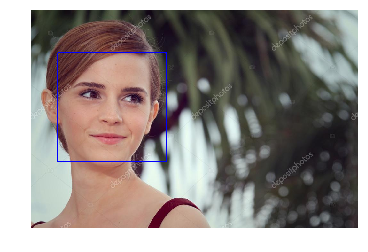

In [18]:
# initialise Cascade classifier with pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# read image
img = cv2.imread('emma.jpg')

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces
faces = face_cascade.detectMultiScale(gray)

# draw bounding box each face found
for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

# display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

Pretty cool stuff. So how does this thing work?

OpenCV's face detector uses a **haar feature-based cascade classifiers**. It is a machine learning based approach trained with a lot of positive and negative(images without faces) images. We extract features from the images, particularly these haar features which are basically convolutional kernels:

![haar features](https://docs.opencv.org/3.4.1/haar_features.jpg)

The algorithm finds the best set of features that best identifies faces. Besides it uses a concept called Cascade of classification which is a multi-stage ensemble technique where output from one stage is used to improve the output of next stage.

**Resources:**
* https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html
* https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework

## Face Recognition
A facial recognition system is a technology capable of identifying or verifying a person from a digital image.

![alt text](https://cdn-images-1.medium.com/max/1600/1*eDcF2ucvCKRLFlJODtWG4g.gif)

**Image source:** [Node.js + face-recognition.js : Simple and Robust Face Recognition using Deep Learning](https://medium.com/@muehler.v/node-js-face-recognition-js-simple-and-robust-face-recognition-using-deep-learning-ea5ba8e852)

**Applications:**
* Security systems
* Payment verification
* Criminal identification
* Social media tagging

Although the Haar-Cascade classifier is fast and works for fairly for a few object detection task. It still identifies only a few predefined features, meanwhile deep learning methods learn patterns on their own and dig out features that are crucial in recognizing faces. One such nueral network architecture is FaceNet.

FaceNet generates a 128-D embedding optimised by minimizing the distance between positive and target image and maximizing the distance between negative and target image.

![alt text](https://i.ytimg.com/vi/6jfw8MuKwpI/maxresdefault.jpg)

Here we will use a python module called `face_recognition` that uses the above mentioned deep learning method to recognize faces.

**Resources:**
* https://arxiv.org/abs/1503.03832
* https://github.com/ageitgey/face_recognition
* https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78

### Installing and using `face_recognition` module

Install dlib and python package

In [0]:
# this will take a while
!apt-get install cmake
!git clone https://github.com/davisking/dlib.git
!cd dlib && python3 setup.py install

Install the python module

In [2]:
!pip3 install face_recognition

In [0]:
!wget https://st2.depositphotos.com/1814084/5205/i/450/depositphotos_52053753-stock-photo-emma-watson.jpg
!mv depositphotos_52053753-stock-photo-emma-watson.jpg emma2.jpg

In [0]:
import face_recognition

### Simple face detection

(-0.5, 1022.5, 681.5, -0.5)

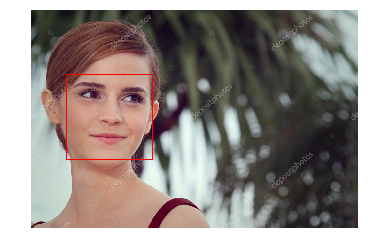

In [24]:
img = face_recognition.load_image_file("emma.jpg")
faces = face_recognition.face_locations(image)

# draw bounding box each face found
for (top, right, bottom, left) in faces:
  cv2.rectangle(img, (left, top), (right, bottom), (255,0,0), 2)

# display the image
plt.imshow(img)
plt.axis('off')

### Facial features detection

Facial features:  dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])


(-0.5, 1022.5, 681.5, -0.5)

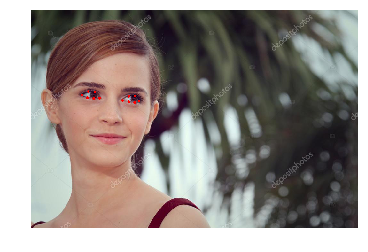

In [49]:
img = face_recognition.load_image_file("emma.jpg")
face_landmarks_list = face_recognition.face_landmarks(img)

for landmarks in face_landmarks_list:
  print('Facial features: ', landmarks.keys())
  left_eye = landmarks['left_eye']
  left_eye = np.array(left_eye).reshape((-1,1,2))
  cv2.polylines(img, left_eye, True, (255,0,0), 8)
  
  right_eye = landmarks['right_eye']
  right_eye = np.array(right_eye).reshape((-1,1,2))
  cv2.polylines(img, right_eye, True, (255,0,0), 8)
  
# display the image
plt.imshow(img)
plt.axis('off')

### Recognize faces in picture

Identified same faces


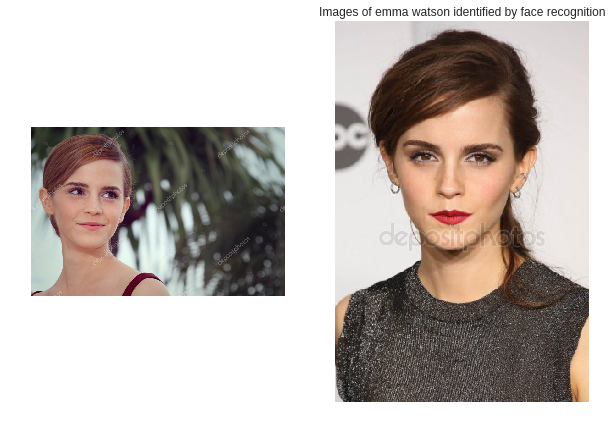

In [69]:
emma1 = face_recognition.load_image_file("emma.jpg")
emma2 = face_recognition.load_image_file("emma2.jpg")

try:
  emma1_face_encoding = face_recognition.face_encodings(emma1)[0]
  emma2_face_encoding = face_recognition.face_encodings(emma2)[0]
except IndexError:
  print('No faces found')
  
results = face_recognition.compare_faces([emma1_face_encoding], emma2_face_encoding)

if results[0]:
  print('Identified same faces')
  
  plt.figure(figsize=(10,10))
  plt.subplot(1, 2, 1)
  plt.imshow(emma1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(emma2)
  plt.axis('off')
  plt.title('Images of emma watson identified by face recognition')

### Playground

Upload your own images and test the `face_recognition` module on them.
Use the code snippets from above.

In [66]:
# code to upload files. rerun to upload multiple files
from google.colab import files
files.upload()

{}

In [0]:
# your code here. Feel free to add as many cells as you want

All the algorithms were discussed on a very high level in this notebook. We recommend going through some of the resources linked in the notebook to gain a better understanding of the magical black boxes we used. You could also try implementing some of these from scratch to gain a stronger intuition. You can take help of datasets like the [labeled faces in the wild (LFW)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwiC3pTOwbHdAhXKPo8KHY9rBDYQFjAAegQIAxAB&url=http%3A%2F%2Fvis-www.cs.umass.edu%2Flfw%2F&usg=AOvVaw1Uld38i0oFhuAayk40WGRq).